# Christian Campbell

# Time Series Modeling

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
path = r"C:\Users\chris\Documents\Bellevue University\7 - Predictive Analytics\us_retail_sales.csv"
retail_df = pd.read_csv(path)
retail_df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1992,146925,147223,146805,148032,149010,149800,150761.0,151067.0,152588.0,153521.0,153583.0,155614.0
1,1993,157555,156266,154752,158979,160605,160127,162816.0,162506.0,163258.0,164685.0,166594.0,168161.0
2,1994,167518,169649,172766,173106,172329,174241,174781.0,177295.0,178787.0,180561.0,180703.0,181524.0
3,1995,182413,179488,181013,181686,183536,186081,185431.0,186806.0,187366.0,186565.0,189055.0,190774.0
4,1996,189135,192266,194029,194744,196205,196136,196187.0,196218.0,198859.0,200509.0,200174.0,201284.0


##### 1.

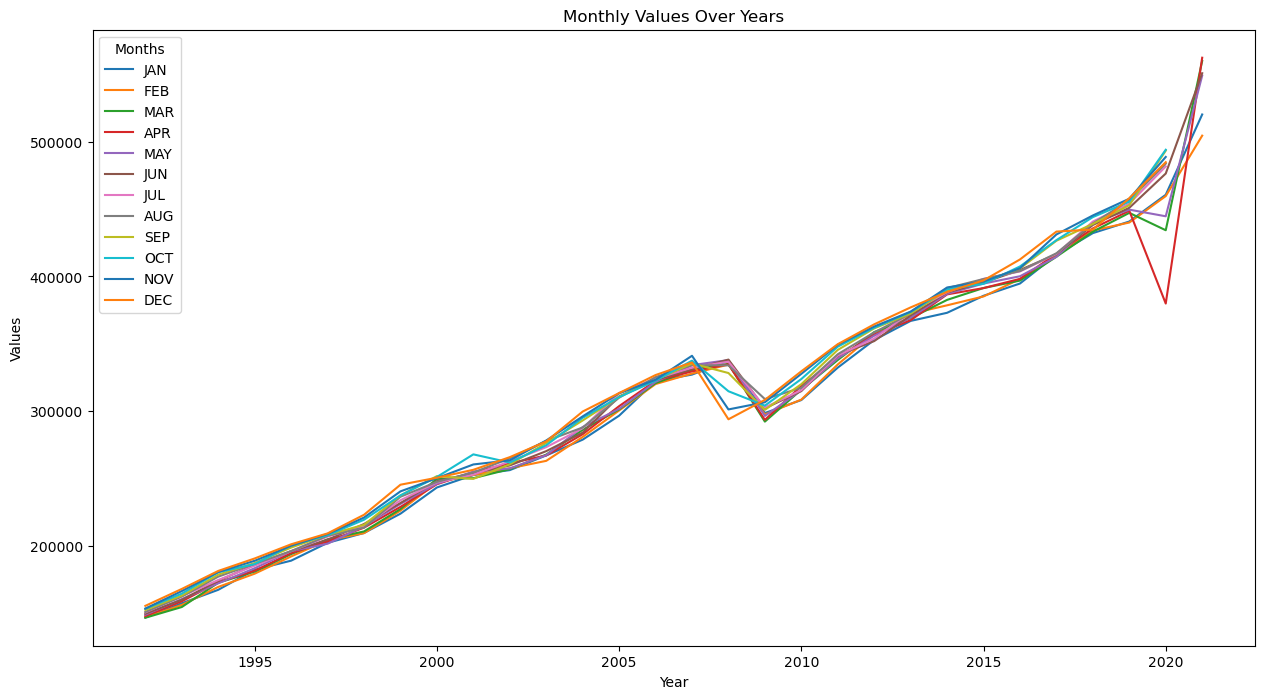

In [4]:
# Plots a line plot
retail_df.set_index('YEAR', inplace=True)
retail_df.plot(figsize=(15, 8))
plt.title('Monthly Values Over Years')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(title='Months')
plt.show()

##### The monthly value over the year increses at a steady rate, with the exception of a dip between 2005 and 2010.

##### 2. 

In [29]:
# Melts the DataFrame
retail_df_melted = retail_df.melt(id_vars=['YEAR'], var_name='MONTH', value_name='VALUE')

# Maps months to numerical values
month_map = {'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6, 'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12}
retail_df_melted['MONTH_NUM'] = retail_df_melted['MONTH'].map(month_map)

# Ensures MONTH_NUM is of integer type
retail_df_melted['MONTH_NUM'] = retail_df_melted['MONTH_NUM'].astype(int)

# Renames columns to 'year', 'month', 'day'
retail_df_melted = retail_df_melted.rename(columns={'YEAR': 'year', 'MONTH_NUM': 'month'})
retail_df_melted['day'] = 1

# Creates a 'DATE' column
retail_df_melted['DATE'] = pd.to_datetime(retail_df_melted[['year', 'month', 'day']])

# Splits the data into training and test sets
start_test_date = pd.to_datetime('2020-07-01')
end_test_date = pd.to_datetime('2021-06-30')

train_set = retail_df_melted[retail_df_melted['DATE'] < start_test_date]
test_set = retail_df_melted[(retail_df_melted['DATE'] >= start_test_date) & (retail_df_melted['DATE'] <= end_test_date)]

# Verifies the splits
print("Training set:")
print(train_set.tail())
print("\nTest set:")
print(test_set)

Training set:
     year MONTH     VALUE  month  day       DATE
353  2015   DEC  397052.0     12    1 2015-12-01
354  2016   DEC  412610.0     12    1 2016-12-01
355  2017   DEC  433282.0     12    1 2017-12-01
356  2018   DEC  434803.0     12    1 2018-12-01
357  2019   DEC  458055.0     12    1 2019-12-01

Test set:
     year MONTH     VALUE  month  day       DATE
29   2021   JAN  520162.0      1    1 2021-01-01
59   2021   FEB  504458.0      2    1 2021-02-01
89   2021   MAR  559871.0      3    1 2021-03-01
119  2021   APR  562269.0      4    1 2021-04-01
149  2021   MAY  548987.0      5    1 2021-05-01
179  2021   JUN  550782.0      6    1 2021-06-01
208  2020   JUL  481627.0      7    1 2020-07-01
238  2020   AUG  483716.0      8    1 2020-08-01
268  2020   SEP  493327.0      9    1 2020-09-01
298  2020   OCT  493991.0     10    1 2020-10-01
328  2020   NOV  488652.0     11    1 2020-11-01
358  2020   DEC  484782.0     12    1 2020-12-01


##### 3. 4. & 5.

In [33]:
# I decided to go a different direction here. 

# Ensures the data is sorted by YEAR
retail_df = retail_df.sort_values('YEAR')

# Splits data into training and test sets
train_df = retail_df[retail_df['YEAR'] < 2020]
test_df = retail_df[retail_df['YEAR'] == 2020]

# Prepares the feature columns
feature_cols = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]

# Trains a model for each month
models = {}
for month in feature_cols:
    X_train = train_df[feature_cols].drop(month, axis=1)
    y_train = train_df[month]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    models[month] = model

# Predicts and evaluate on the test set
rmse_scores = {}
for month in feature_cols:
    X_test = test_df[feature_cols].drop(month, axis=1)
    y_test = test_df[month]
    
    y_pred = models[month].predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores[month] = rmse

# Displays the RMSE for each month
for month, score in rmse_scores.items():
    print(f'RMSE for {month}: {score:.2f}')

RMSE for JAN: 18615.30
RMSE for FEB: 11087.28
RMSE for MAR: 10807.04
RMSE for APR: 61978.69
RMSE for MAY: 4127.40
RMSE for JUN: 4513.89
RMSE for JUL: 4260.45
RMSE for AUG: 1181.82
RMSE for SEP: 21144.37
RMSE for OCT: 32083.29
RMSE for NOV: 15708.47
RMSE for DEC: 25783.37
